# POLYNOMIAL REGRESSION


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time 
from sklearn.datasets import load_boston
from matplotlib import cm
import seaborn as sns
import MachineLearning as ml

In [2]:
boston_dataset = load_boston()

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#keys = metodo del dictionary
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
#target = attributo
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Create a Pandas DataFrame for the Boston dataset

In [6]:
dataFrame = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [7]:
dataFrame['MEDV'] = boston_dataset.target

In [8]:
dataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# PLOT The Pearson Correlation Matrix

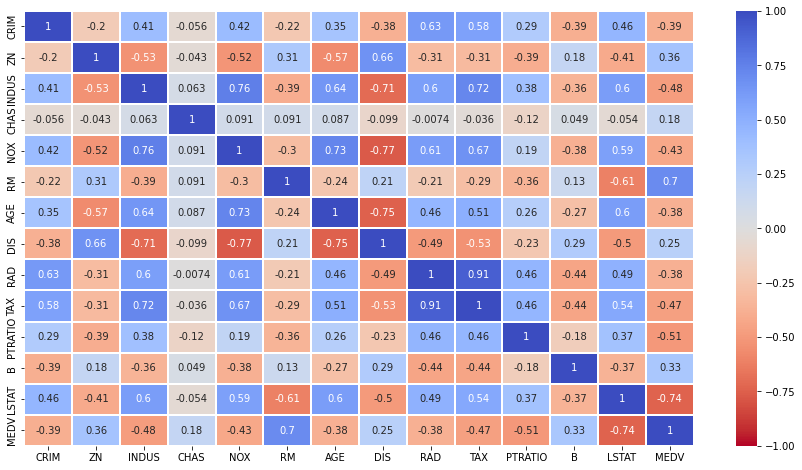

In [9]:
f, (ax1) = plt.subplots(1,1, figsize = (15,8))
correlation_matrix = dataFrame.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm_r', ax=ax1, linewidths=0.2, vmin=-1, vmax=1)
plt.show()

#RM ed LSTAT sono le 2 features che esibiscono più correlazione con il target

# PLOT The Spearman Correlation Matrix

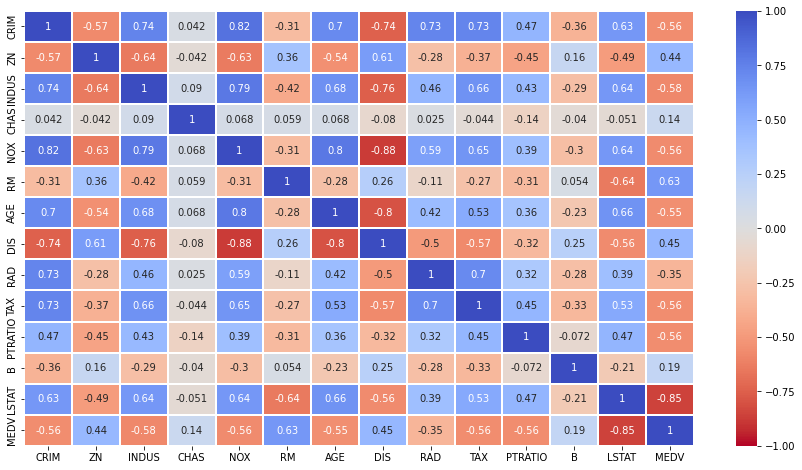

In [10]:
f, (ax1) = plt.subplots(1,1, figsize = (15,8))
correlation_matrix = dataFrame.corr(method = 'spearman')
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm_r', ax=ax1, linewidths=0.2, vmin=-1, vmax=1)
plt.show()


# Scatter Plot 

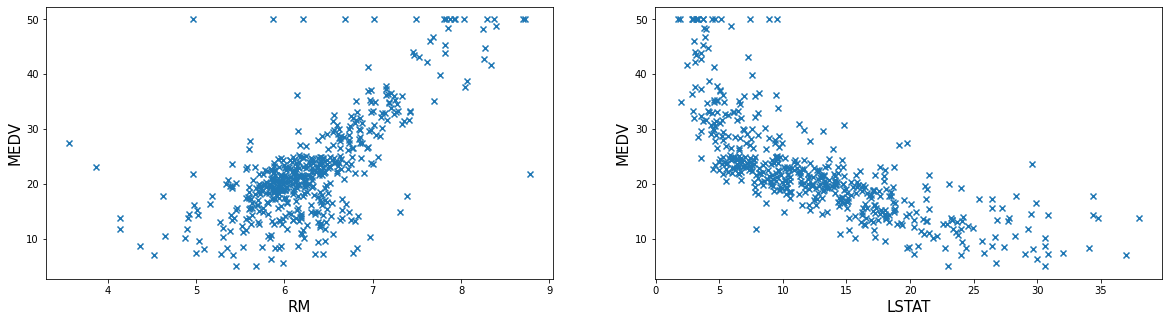

In [11]:
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(121)
ax1.scatter(dataFrame['RM'], dataFrame['MEDV'], marker='x')
ax1.set_xlabel('RM', fontsize= 15)
ax1.set_ylabel('MEDV', fontsize= 15)

ax2 = fig.add_subplot(122)
ax2.scatter(dataFrame['LSTAT'], dataFrame['MEDV'], marker='x')
ax2.set_xlabel('LSTAT', fontsize= 15)
ax2.set_ylabel('MEDV', fontsize= 15)

plt.show()

# Generate Polynomial Features 'LSTAT'

In [12]:
selected_feature = 'RM'

In [13]:
X = dataFrame[[selected_feature]]

In [14]:
def polinomyal_features(dataFrame, degree, column):
    
    new_dataFrame = dataFrame.copy()
    for i in range(1,degree):
        column_name = '('+column + ')**{}'.format(i+1)
        new_dataFrame[column_name] = dataFrame[column]**(i+1)

    return new_dataFrame

In [15]:
def featureScaling(X):
    
    Z = pd.DataFrame.copy(X)
    mu = np.mean(Z, axis = 0) #axis = 0 lo fa per le colonne
    std = np.std(Z, axis = 0)
    
    Z = (Z - mu)/std
 
    return Z

In [16]:
x_poly_2_scaled = featureScaling(polinomyal_features(X,2,selected_feature))
x_poly_3_scaled = featureScaling(polinomyal_features(X,3,selected_feature))
x_poly_4_scaled = featureScaling(polinomyal_features(X,4,selected_feature))
x_poly_5_scaled = featureScaling(polinomyal_features(X,5,selected_feature))
x_poly_6_scaled = featureScaling(polinomyal_features(X,6,selected_feature))
x_poly_7_scaled = featureScaling(polinomyal_features(X,7,selected_feature))
x_poly_8_scaled = featureScaling(polinomyal_features(X,8,selected_feature))

In [17]:
x_linear = np.c_[np.ones((X.shape[0],1)), X]
x_poly_2_scaled_int = np.c_[np.ones((x_poly_2_scaled.shape[0],1)), x_poly_2_scaled]
x_poly_3_scaled_int = np.c_[np.ones((x_poly_3_scaled.shape[0],1)), x_poly_3_scaled]
x_poly_4_scaled_int = np.c_[np.ones((x_poly_4_scaled.shape[0],1)), x_poly_4_scaled]
x_poly_5_scaled_int = np.c_[np.ones((x_poly_5_scaled.shape[0],1)), x_poly_5_scaled]
x_poly_6_scaled_int = np.c_[np.ones((x_poly_6_scaled.shape[0],1)), x_poly_6_scaled]
x_poly_7_scaled_int = np.c_[np.ones((x_poly_7_scaled.shape[0],1)), x_poly_7_scaled]
x_poly_8_scaled_int = np.c_[np.ones((x_poly_8_scaled.shape[0],1)), x_poly_8_scaled]


In [18]:
Y = dataFrame[['MEDV']].values

# Gradient Descent

In [19]:
def costVectorial(x,y, theta= np.zeros((X.shape[1],1))):
    m = x.shape[0]

    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()

    J = (x.dot(theta) - y).T.dot((x.dot(theta) - y))
    J = J/(2*m)

    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [20]:
def gradientDescentVectorized(x, y, theta = np.zeros((x_poly_2_scaled_int.shape[1],1)), alpha = 0.001, max_iters = 200000, early = False, epsilon = 0.00001):
    
    m = x.shape[0]

    J_history = np.zeros((max_iters,1))
    theta_history = []

    theta_gd = np.copy(theta)
    
    elapsed_time = 0
    elapsed_time -= time.time()

    for iter in range (max_iters):
        J_history[iter],_ = costVectorial(x,y, theta = theta_gd)
        
        theta_gd = theta_gd - (alpha/m) *x.T.dot(x.dot(theta_gd) - y)
        theta_history.append(np.copy(theta_gd))        
        
        if(early):
            if(iter != 0):
                if(np.abs(J_history[iter] - J_history[iter-1]) < epsilon):
                        theta_history.append(theta_gd)
                        elapsed_time += time.time()
                        elapsed_time *= 1000 # porto i secondi in millisecondi
                        return theta_gd, J_history[J_history != 0], round(elapsed_time,3), theta_history
    
    theta_history.append(np.copy(theta_gd))
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi

    return theta_gd, J_history, round(elapsed_time,3), theta_history
    

In [21]:
theta_linear, cost_history_vectorized_linear, _, _ = gradientDescentVectorized(x_linear, Y, theta = np.zeros((x_linear.shape[1], 1)), alpha = 0.01 , max_iters = 150000, early=False, epsilon=0.00001)
theta_poly_2, cost_history_vectorized_2, _, _ = gradientDescentVectorized(x_poly_2_scaled_int, Y, theta = np.zeros((x_poly_2_scaled_int.shape[1], 1)), alpha = 0.01 , max_iters = 150000, early=False, epsilon=0.00001)
theta_poly_3, cost_history_vectorized_3, _, _ = gradientDescentVectorized(x_poly_3_scaled_int, Y, theta = np.zeros((x_poly_3_scaled_int.shape[1], 1)), alpha = 0.01 , max_iters = 150000, early=False, epsilon=0.00001)
theta_poly_4, cost_history_vectorized_4, _, _ = gradientDescentVectorized(x_poly_4_scaled_int, Y, theta = np.zeros((x_poly_4_scaled_int.shape[1], 1)), alpha = 0.01 , max_iters = 150000, early=False, epsilon=0.00001)
theta_poly_5, cost_history_vectorized_5, _, _ = gradientDescentVectorized(x_poly_5_scaled_int, Y, theta = np.zeros((x_poly_5_scaled_int.shape[1], 1)), alpha = 0.01 , max_iters = 150000, early=False, epsilon=0.00001)
theta_poly_6, cost_history_vectorized_6, _, _ = gradientDescentVectorized(x_poly_6_scaled_int, Y, theta = np.zeros((x_poly_6_scaled_int.shape[1], 1)), alpha = 0.01 , max_iters = 150000, early=False, epsilon=0.00001)
theta_poly_7, cost_history_vectorized_7, _, _ = gradientDescentVectorized(x_poly_7_scaled_int, Y, theta = np.zeros((x_poly_7_scaled_int.shape[1], 1)), alpha = 0.01 , max_iters = 150000, early=False, epsilon=0.00001)
theta_poly_8, cost_history_vectorized_8, _, _ = gradientDescentVectorized(x_poly_8_scaled_int, Y, theta = np.zeros((x_poly_8_scaled_int.shape[1], 1)), alpha = 0.01 , max_iters = 150000, early=False, epsilon=0.00001)



In [22]:
X_2, yhat_2 = zip(*sorted(zip(X.values,x_poly_2_scaled_int.dot(theta_poly_2))))
X_3, yhat_3 = zip(*sorted(zip(X.values,x_poly_3_scaled_int.dot(theta_poly_3))))
X_4, yhat_4 = zip(*sorted(zip(X.values,x_poly_4_scaled_int.dot(theta_poly_4))))
X_5, yhat_5 = zip(*sorted(zip(X.values,x_poly_5_scaled_int.dot(theta_poly_5))))
X_6, yhat_6 = zip(*sorted(zip(X.values,x_poly_6_scaled_int.dot(theta_poly_6))))
X_7, yhat_7 = zip(*sorted(zip(X.values,x_poly_7_scaled_int.dot(theta_poly_7))))
X_8, yhat_8 = zip(*sorted(zip(X.values,x_poly_8_scaled_int.dot(theta_poly_8))))


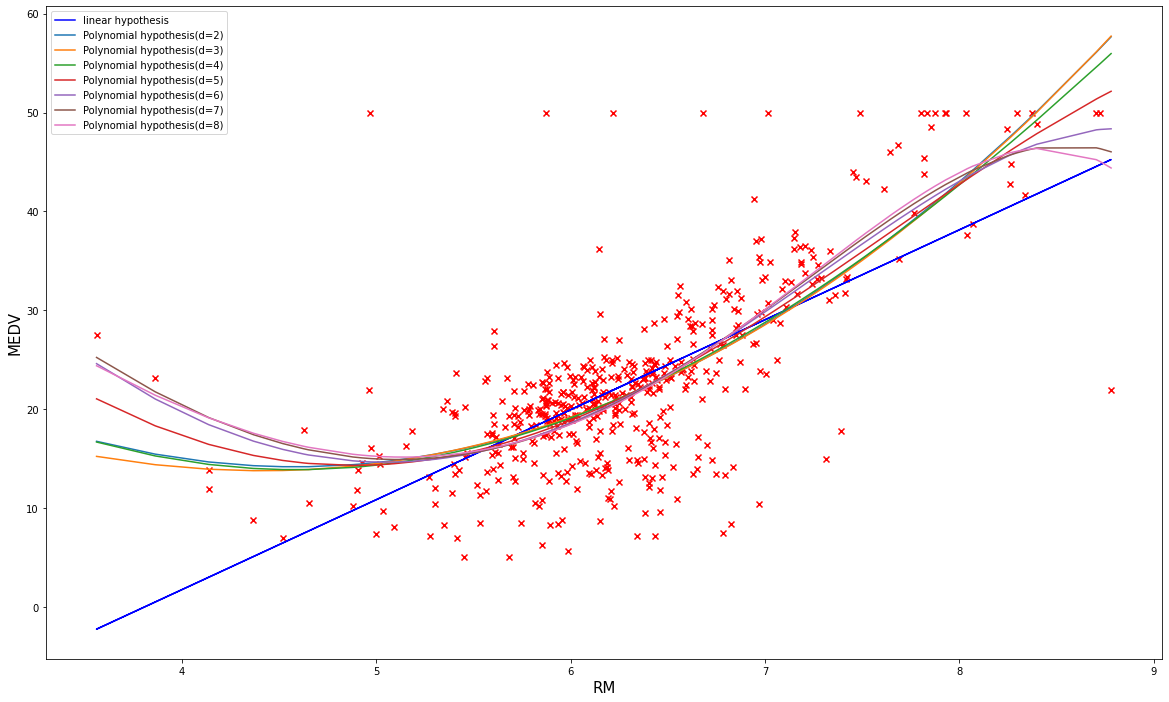

In [23]:
plt.figure(figsize=(20,12))
plt.scatter(X, Y, marker='x', c='r')
plt.plot(X.values, x_linear.dot(theta_linear), label='linear hypothesis', c='b')
plt.plot(X_2, yhat_2, label='Polynomial hypothesis(d=2)')
plt.plot(X_3, yhat_3, label='Polynomial hypothesis(d=3)')
plt.plot(X_4, yhat_4, label='Polynomial hypothesis(d=4)')
plt.plot(X_5, yhat_5, label='Polynomial hypothesis(d=5)')
plt.plot(X_6, yhat_6, label='Polynomial hypothesis(d=6)')
plt.plot(X_7, yhat_7, label='Polynomial hypothesis(d=7)')
plt.plot(X_8, yhat_8, label='Polynomial hypothesis(d=8)')


plt.xlabel(selected_feature, fontsize= 15)
plt.ylabel('MEDV', fontsize= 15)
plt.legend(loc = 'best')
plt.show()


In [24]:
cost_history_vectorized_8[-1]

array([17.953])

In [ ]:
ml.polynomial_regression(dataFrame, Y, selected_feature, 45)